### Description of Variables
1. status: edible=e, poisinous=p
2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
5. bruises?: bruises=t,no=f 
6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
7. gill-attachment: attached=a,descending=d,free=f,notched=n 
8. gill-spacing: close=c,crowded=w,distant=d 
9. gill-size: broad=b,narrow=n 
10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
11. stalk-shape: enlarging=e,tapering=t 
12. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
17. veil-type: partial=p,universal=u 
18. veil-color: brown=n,orange=o,white=w,yellow=y 
19. ring-number: none=n,one=o,two=t 
20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
22. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
23. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [309]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score

In [310]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",header = None)


In [311]:
df.columns = ['status',
              'cap-shape',
              'cap-surface',
              'cap-color',
              'bruises',
              'odor',
              'gill-attachment',
              'gill-spacing',
              'gill-size',
              'gill-color',
              'stalk-shape',
              'stalk-root',
              'stalk-surface-above-ring',
              'stalk-surface-below-ring',
              'stalk-color-above-ring',
              'stalk-color-below-ring',
              'veil-type',
              'veil-color',
              'ring-number',
              'ring-type',
              'spore-print-color',
              'population',
              'habitat']

In [312]:
# check the training data for null values
#df.isnull().sum()

1. <font color='green'>Status:</font> 
    - edible = e
    - poisinous = p
2. <font color='green'>Odor:</font>  
    - almond = a
    - anise = l
    - creosote = c
    - fishy = y
    - foul = f 
    - musty = m
    - none = n
    - pungent = p
    - spicy = s 
3. <font color='green'>Bruises:</font>  
    - bruises = t
    - no = f
4. <font color='green'>Population:</font>  
    - abundant = a
    - clustered = c
    - numerous = n 
    - scattered = s
    - several = v
    - solitary = y 

In [354]:
df['status'].value_counts()

e    4208
p    3916
Name: status, dtype: int64

In [355]:
mr_sub = df.copy()
mr_sub = df[['status', 
             'odor', 
             'bruises', 
             'population'
            ]].copy()

In [315]:
mr_sub.head()

,status,odor,bruises,population
0,p,p,t,s
1,e,a,t,n
2,e,l,t,n
3,p,p,t,s
4,e,n,f,a


### EDA:
Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and
show plots for edible/poisonous vs. odor as well as the other columns that you selected. It is up to you to
decide which types of plots to use for these tasks. Include text describing your EDA findings.

In [415]:
mr_sub.describe()

,status,odor,bruises,population
count,8124,8124,8124,8124
unique,2,9,2,6
top,e,n,f,v
freq,4208,3528,4748,4040


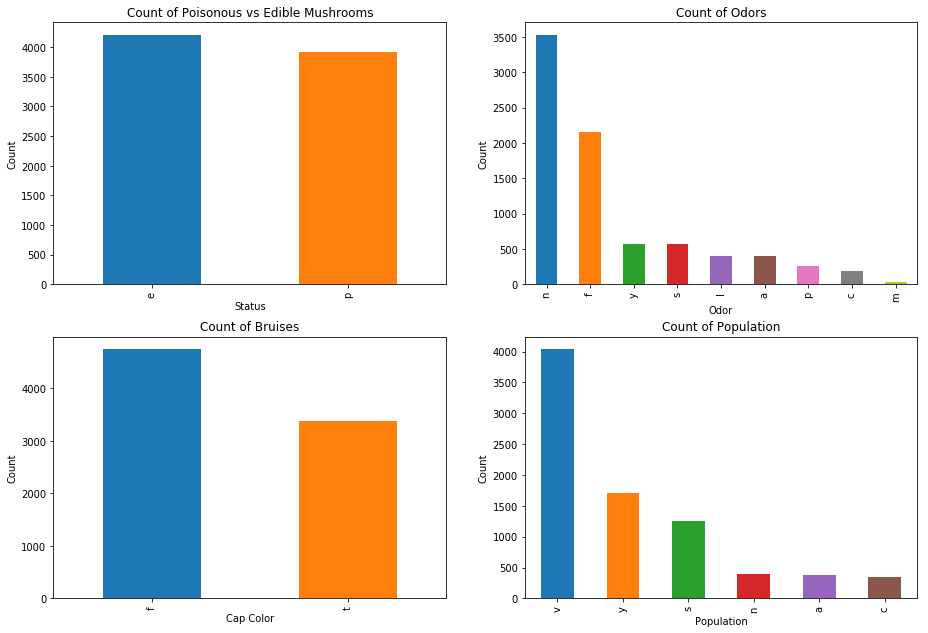

In [316]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
pd.Series(df['status']).value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Status")
plt.title('Count of Poisonous vs Edible Mushrooms');

ax2 = fig.add_subplot(2,2,2)
pd.Series(df['odor']).value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Odor")
plt.title('Count of Odors');

ax3 = fig.add_subplot(2,2,3)
pd.Series(df['bruises']).value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Cap Color")
plt.title('Count of Bruises');

ax4 = fig.add_subplot(2,2,4)
pd.Series(df['population']).value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Population")
plt.title('Count of Population');

plt.subplots_adjust(left=4, 
                    bottom=4, 
                    right=6, 
                    top=6, 
                    wspace=None, 
                    hspace=None)

The data appears to be pretty balanced, with equal number of poisinous and edible samples of mushrooms. 

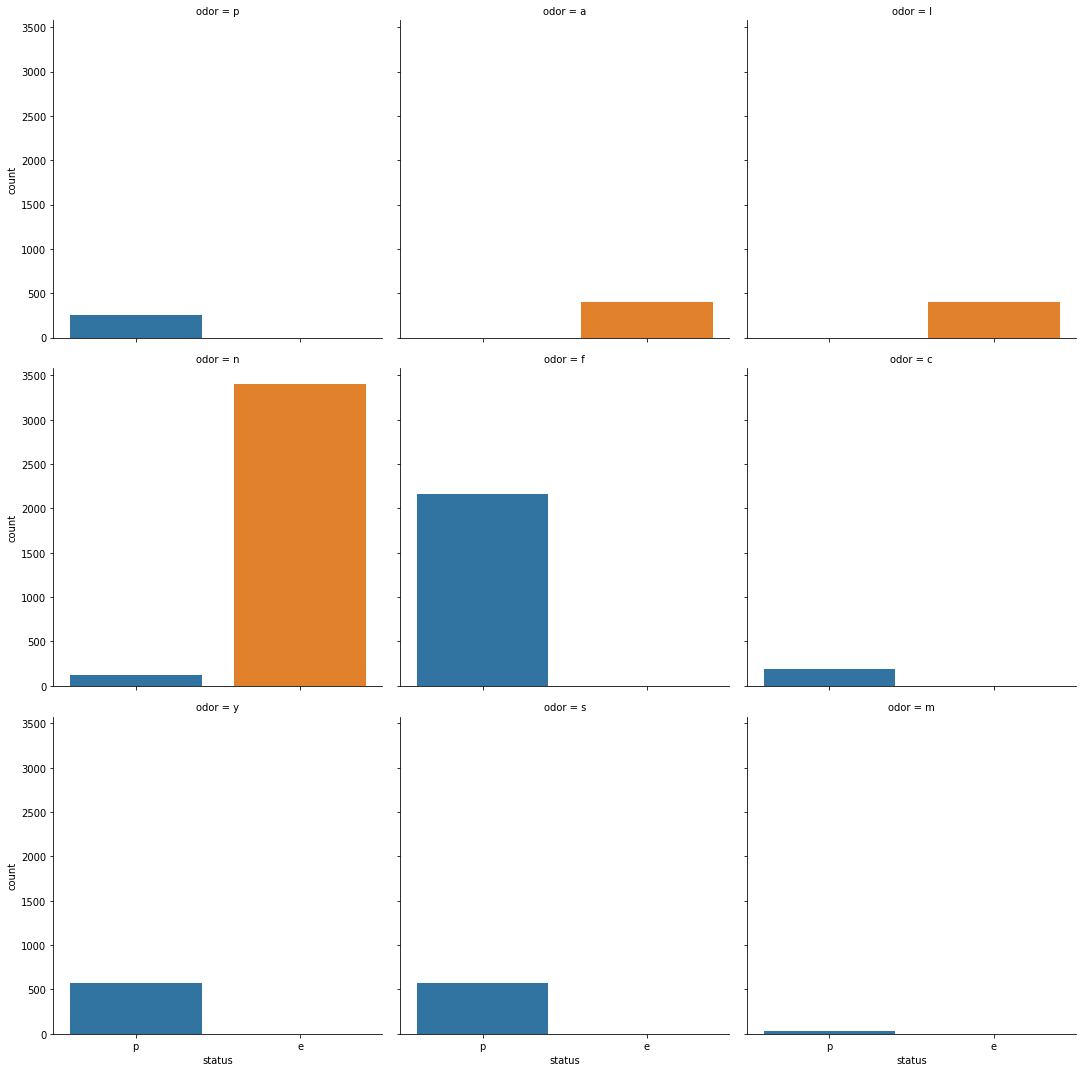

In [409]:
# creates a bar plot for each type of odor comparing the amount of values that are edible vs poisinous
sns.catplot('status', col='odor', data=df, kind='count', col_wrap=3);

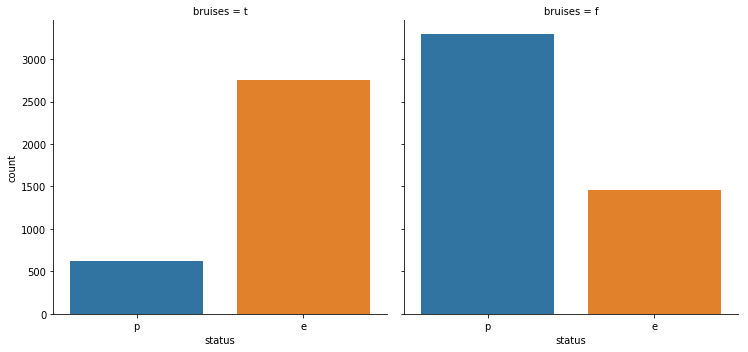

In [410]:
# creates a bar plot for each type of bruise comparing the amount of values that are edible vs poisinous
sns.catplot('status', col='bruises', data=df, kind='count', col_wrap=4);

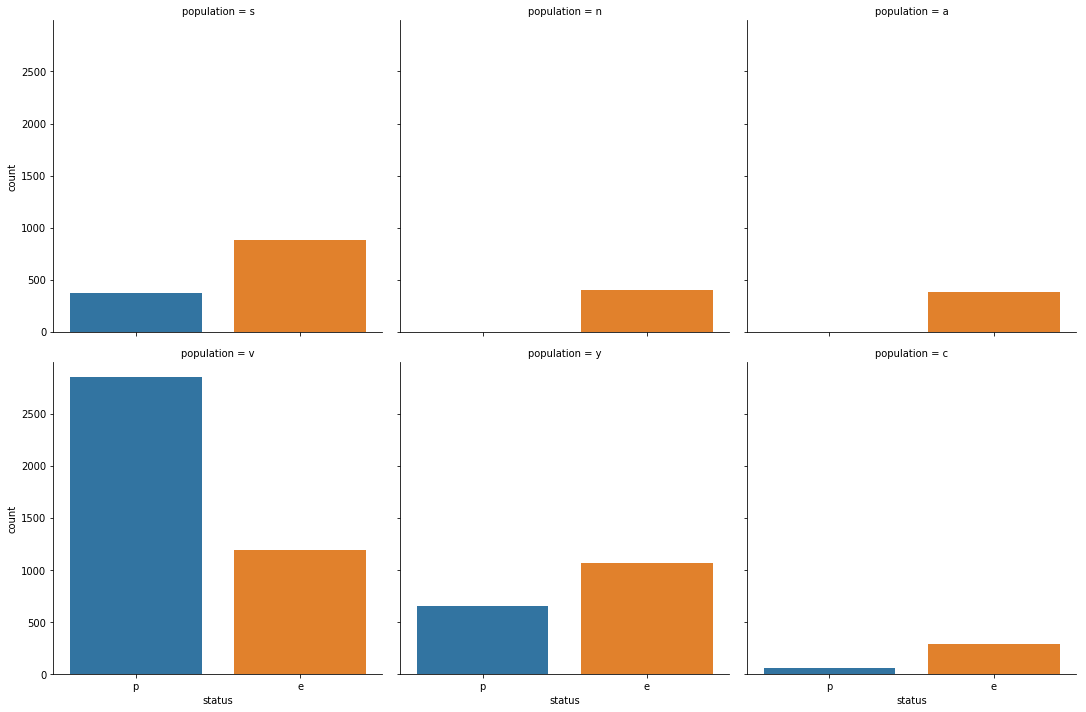

In [411]:
# creates a bar plot for each type of population comparing the amount of values that are edible vs poisinous
sns.catplot('status', col='population', data=df, kind='count', col_wrap=3);

Include some text describing your preliminary conclusions about whether any of the other columns you’ve
included in your subset (i.e., aside from the poisonous/edible indicator) could be helpful in predicting if a specific
mushroom is edible or poisonous.

- The odor column could give insight into the status of a mushroom, since there is such a great gap for the status of a mushroom for different smells. A mushroom which is one smell will be almost completely poisinous or completely edible.
- The bruises column could also potentially tell since there are pretty large margins between the different statuses, but it wont be a strong of a proof as odor.
- Population will also be a pretty strong characteristic to use since there are many populations which are completely edible and many of the populations are one or the other by a large margin.

***

### Dummy Variable Creation:

In [317]:
#status = {'p': 0,'e': 1} 
#mr_sub.status = [status[item] for item in mr_sub.status] 
#mr_sub.head()



In [318]:
# Create dummy variables of each of the chosen variables
status_subdum = pd.get_dummies(mr_sub.status, prefix = 'status')
odor_subdum = pd.get_dummies(mr_sub.odor, prefix = 'odor')
bruises_subdum = pd.get_dummies(mr_sub.bruises, prefix = 'bruises')
population_subdum = pd.get_dummies(mr_sub.population, prefix = 'population')

In [356]:
# Combine dummy variables into a single dataframe
dumdf = pd.concat([status_subdum, odor_subdum, bruises_subdum, population_subdum], axis = 1)
dumdf.head()

,status_e,status_p,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,bruises_f,bruises_t,population_a,population_c,population_n,population_s,population_v,population_y
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


***

### Predictive Model:

In [436]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [451]:
dumdf.head()

,status_e,status_p,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,bruises_f,bruises_t,population_a,population_c,population_n,population_s,population_v,population_y
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


In [523]:
X = dumdf.drop(['status_e', 'status_p'], axis = 1)

In [524]:
lm = LinearRegression()

In [527]:
lm.fit(X, dumdf.status_e)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [528]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -93862351252.12129


In [531]:
len(lm.coef_)

17

In [512]:
X=dumdf.iloc[:,2:].values # all columns except dependent variable
y=dumdf.iloc[:,0].values # only dependent variable column

X.shape, y.shape

((8124, 17), (8124,))

In [513]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [514]:
regressor=LogisticRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Using Simple Logistic Regression we achieve an accuracy of',np.mean(y_test==y_pred)*100, '%')

Using Simple Logistic Regression we achieve an accuracy of 98.83076923076923 %


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


***

In [515]:
X=dumdf.iloc[:,2:10].values # all odor columns
y=dumdf.iloc[:,0].values # only dependent variable column

X.shape, y.shape

((8124, 8), (8124,))

In [516]:
X_odor_train,X_odor_test,y_odor_train,y_odor_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [517]:
#regressor=LogisticRegression()
regressor.fit(X_odor_train,y_odor_train)
y_pred=regressor.predict(X_odor_test)
print('Using Simple Logistic Regression we achieve an accuracy of',np.mean(y_odor_test==y_pred)*100, '%')


Using Simple Logistic Regression we achieve an accuracy of 98.83076923076923 %


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Sources:
- https://stackoverflow.com/questions/19746350/how-does-one-change-color-in-markdown-cells-ipython-jupyter-notebook
- https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/
- https://seaborn.pydata.org/generated/seaborn.catplot.html